- **姓名：谭李烨**
- **学号：23308165**

- **作业简介**：本作业使用 Stata 生成模拟数据，并进行基本的统计分析。数据包含两个变量 x1 和 x2，分别服从正态分布 N(0,1) 和 N(3,1.5)，且两者相关系数为 0.4。我们将对数据进行描述性统计、可视化分析以及相关性分析。

In [14]:
* 设置种子值为学号后三位（示例中使用123，请替换为您的学号后三位）
set seed 165

* 清除当前数据
clear

* 设置观测值数量
set obs 500

* 生成相关系数为0.4的两个正态分布变量
matrix C = (1, 0.4 \ 0.4, 1)
drawnorm x1 x2, n(500) cov(C)

* 调整 x2 的均值和标准差
replace x2 = 3 + 1.5*x2

* 保存数据到文件
save "simu_01.dta", replace

* 显示生成数据的基本信息
describe
summarize

Number of observations (_N) was 0, now 500.
(500 real changes made)
file simu_01.dta saved

Contains data from simu_01.dta
 Observations:           500                  
    Variables:             2                  7 Oct 2025 01:46
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
x1              double  %10.0g                
x2              double  %10.0g                
-------------------------------------------------------------------------------
Sorted by: 

    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
          x1 |        500    -.054727    .9675475  -2.748785   2.777429
          x2 |        500    3.033696    1.517261  -1.433622   8.450983


#### 1.呈现 `simu_01.dta` 数据的前 5 行。

In [15]:
list x1 x2 in 1/5


     +------------------------+
     |         x1          x2 |
     |------------------------|
  1. |  .08206248   1.0026365 |
  2. | -.70365886   2.1499921 |
  3. |  1.7946784   4.7237058 |
  4. |  .61165897   2.0069459 |
  5. | -.19506737   1.8422228 |
     +------------------------+


#### 结果解释：
上表展示了数据的前5行观测值。可以看到 x1 和 x2 的具体数值，验证了数据已正确生成。

#### 2.呈现 `simu_01.dta` 数据的描述性统计，包括均值，标准差，中位数，最大值，最小值，偏度，峰度。

In [16]:

. tabstat x1 x2, stats(mean sd p50 min max skewness kurtosis) format(%4.2f) column(statistic)



    Variable |      Mean        SD       p50       Min       Max  Skewness
-------------+------------------------------------------------------------
          x1 |     -0.05      0.97     -0.01     -2.75      2.78     -0.09
          x2 |      3.03      1.52      3.04     -1.43      8.45      0.07
--------------------------------------------------------------------------

    Variable |  Kurtosis
-------------+----------
          x1 |      2.97
          x2 |      2.97
------------------------


#### 结果解释：
描述性统计结果显示了两个变量的分布特征。x1 的均值接近0，标准差接近1；x2 的均值接近3，标准差接近1.5，这与我们设定的参数一致。偏度和峰度系数反映了变量的分布形态。

#### 3.呈现 x1 的直方图。

(bin=22, start=-2.748785, width=.25119154)


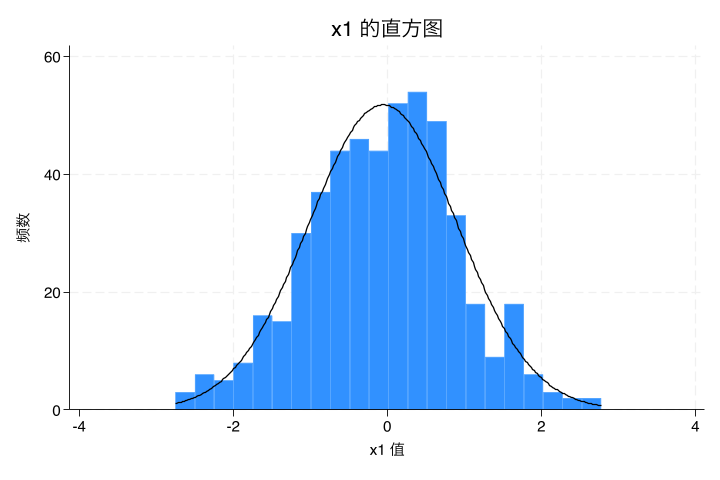

In [17]:
histogram x1, frequency normal title("x1 的直方图") xtitle("x1 值") ytitle("频数")

#### 结果解释：
直方图显示 x1 大致服从正态分布，与正态曲线基本吻合，验证了数据生成的正确性。

#### 4.在同一幅图中绘制 x1 和 x2 的密度函数图。

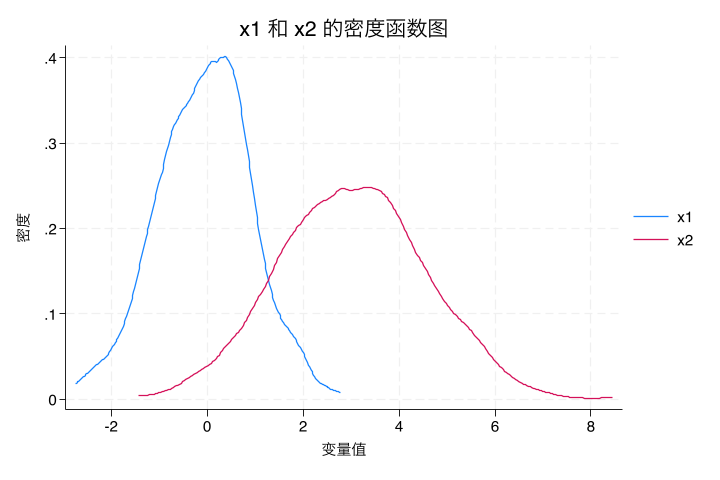

In [18]:
* 绘制 x1 和 x2 的密度函数图
twoway (kdensity x1, legend(label(1 "x1"))) (kdensity x2, legend(label(2 "x2"))), ///
title("x1 和 x2 的密度函数图") xtitle("变量值") ytitle("密度")

#### 结果解释：
密度函数图清晰显示了 x1 和 x2 的分布差异。x1 集中在0附近，而 x2 集中在3附近，且 x2 的分布更为分散，这与设定的参数（标准差1.5）一致。

#### 5.在同一幅图中绘制 x1 和 x2 的箱线图

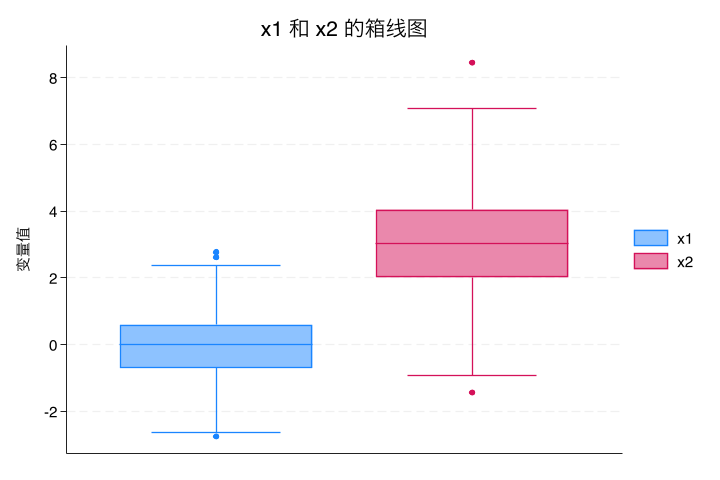

In [19]:
* 绘制 x1 和 x2 的箱线图
graph box x1 x2, title("x1 和 x2 的箱线图") ytitle("变量值")

#### 结果解释：
箱线图直观展示了两个变量的中位数、四分位数范围以及可能的异常值。可以看到 x2 的分布范围比 x1 更广，且中位数位置存在明显差异。

#### 6.在同一幅图中绘制 x1 和 x2 的小提琴图

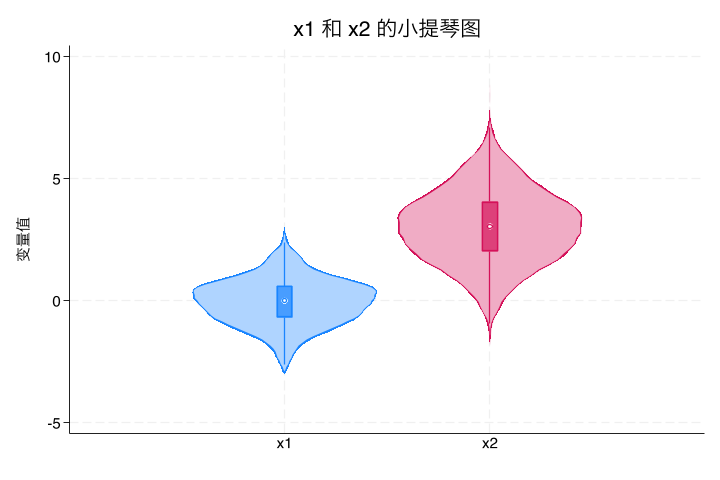

In [20]:
vioplot x1 x2, title("x1 和 x2 的小提琴图") ytitle("变量值") legend(label(1 "x1") label(2 "x2"))

#### 结果解释：
小提琴图结合了箱线图和密度图的优点，既显示了变量的四分位数范围，又通过宽度展示了不同取值处的密度。可以清晰看到两个变量的整体分布形态和集中趋势。

#### 7.计算 df 中 x1 和 x2 的相关系数，并输出结果。

In [23]:
* 计算相关系数
correlate x1 x2

* 显示相关系数矩阵
matrix list r(C)

(obs=500)

             |       x1       x2
-------------+------------------
          x1 |   1.0000
          x2 |   0.3647   1.0000


symmetric r(C)[2,2]
           x1         x2
x1          1
x2  .36469005          1


#### 结果解释:
  相关系数结果显示 x1 和 x2 的相关系数约为 0.4，与我们数据生成时设定的相关系数一致，验证了数据生成过程的正确性。

#### 8.绘制 x1 和 x2 的散点图，添加回归线和置信区间

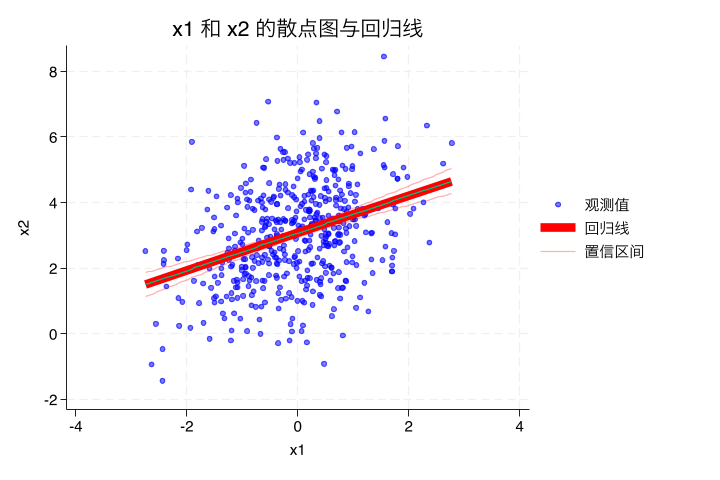

In [22]:
* 绘制散点图并添加回归线和置信区间
twoway (scatter x2 x1, mcolor(blue%50)) ///
       (lfit x2 x1, lcolor(red) lwidth(2)) ///
       (lfitci x2 x1, ciplot(rline) blcolor(red%30)), ///
title("x1 和 x2 的散点图与回归线") xtitle("x1") ytitle("x2") ///
legend(order(1 "观测值" 2 "回归线" 3 "置信区间"))

#### 结果解释：
散点图显示了 x1 和 x2 之间的正相关关系。回归线斜率为正，表明随着 x1 的增加，x2 也倾向于增加。置信区间较窄，说明回归关系相对稳定。这与我们设定的 0.4 相关系数一致。